# **Steps**
1.  Make Hypothesis about the data without looking at it
2. Data exploration (find nuances in the data which require remediation)
3. Perform Data cleaning and features enginnering, inout missing values and solve other irregularities
4. make new features and also make the data mode-friendly using one-hot encoding
%. Build regression model

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/SL_ML/LE_3_

/content/drive/My Drive/Colab Notebooks/SL_ML/LE_3_


In [4]:
#import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Load test and train datasets
train = pd.read_csv("bigmart_train.csv")
test = pd.read_csv("bigmart_test.csv")

In [6]:
#Check numb er of rows and columns in train data set
train.shape

(8523, 12)

In [7]:
#print the name of the columns in train datasets
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
#check number of rows and columns in  test dataset
test.shape

(5681, 11)

In [9]:
#print name of columns in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
#combine test and train datast into one file to perform EDA
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [11]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
#Describe function for numerical data summmary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#check for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [14]:
#Item_weight(2439 missing values), Outlet_size(4016 missing values), Item_outlet_sales(5681)

In [15]:
#print the unique values in the Item_Fat_Content column, where there are only two unique types of fat content in items: Low fat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
#print the uniw=qu values in the Outlet_Establishment_year column, where the data ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [17]:
#Calculate the Outlet_age
data["Outlet_age"] = 2018 - data["Outlet_Establishment_Year"]

In [18]:
#Unique values in Outlet_size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

**Note: there are also missing values in this column**

In [19]:
#printing the count value of Item_Fat_Content column
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can see that low fat products are the most abundant

In [20]:
#print the count value of OUtlet_size
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

we can see the majority of outlets are medium and small-scale outlets

In [21]:
#Use the function to find out the most commonly occurring value in the Outlet_Size
data["Outlet_Size"].mode()[0]

'Medium'

The output shows that medium is the most occurring value

In [27]:
#two variables with missing values
#Replacing the missing values in Outlet_Size with the value medium
data["Outlet_Size"] = data['Outlet_Size'].fillna(data["Outlet_Size"].mode()[0])

In [28]:
#Replacing missing values in Item_Weight with mean weight
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

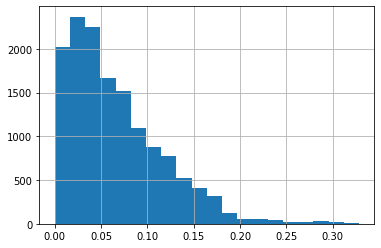

In [29]:
#Plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [30]:
#Detecting Outliers
#An outlier is a data point that lies outside the overall position in a distribution
#A commonly used rule states that a data point ts an outlier if it is more than 1.5*IQR above the the third quartile or below the first quartile
#Using this we can remove the outliers and output the resulting data in fill_data variable
#calculating the first quantile for Item_Visibility
Q1 = data['Item_Visibility'].quantile(0.25)


In [31]:
#Calculate the second quantile
Q3 = data['Item_Visibility'].quantile(0.75)

In [32]:
#Calculate the interquartile range(IQR)
IQR = Q3 - Q1

In [35]:
#Using this we can remove the outliers and output the resulting data in fill_data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [36]:
#Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,12.792854,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,12.792854,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [37]:
#Check the shape of the resulting dataset without outliers
fill_data.shape

(13943, 14)

In [38]:
#Shape of the original dataset with outliers
data.shape

(14204, 14)

In [39]:
#Assign fill_data dataset to data Dataframe
data = fill_data

In [40]:
data.shape

(13943, 14)

In [41]:
#MOdify Item_Visibility by converting the numerical values into the categories Low Visibility, Visibility and High visibility
data['Item_Visibility_bins'] = pd.cut(data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [42]:
#Print the count of Item_Visibility_bins
data['Item_Visibility_bins'].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [43]:
#Replace null values with low visibility
data['Item_Visibility_bins'] = data['Item_Visibility_bins'].replace(np.nan, "Low Viz", regex=True)

In [46]:
#we found typos and differences in representation in categories of Item_Fat_Content variable.
#This can be corrected using the code thus

#Replace all other reps of Low fat with Low Fat
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(["low fat", "LF"], "Low Fat")

In [47]:
#Replace all reps of reg with Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(["reg", "Regular"])

In [48]:
#print unique fat count
data['Item_Fat_Content'].unique()

array(['Low Fat'], dtype=object)

In [58]:
#Code all categorical variables as numeric using 'LabelEncoder' from sklearn;s preprocessing module
#Initialize the label encoder
le = LabelEncoder()

In [59]:
#Transform Item_fat_content
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

In [60]:
#transform Item_visibility_bins
data['Item_Visibility_bins'] = le.fit_transform(data['Item_Visibility_bins'])

In [61]:
#transform outlet_size
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

In [62]:
#transform outlet_location_type
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

In [54]:
#print the unique values of outlet_type
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [66]:
#Create dummies for Outlet_type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [67]:
#explore the column Item_identifier
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [68]:
#As there are multiple values of food, nonconsumable items, and drinks with different numbers, comnbine the item type
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [72]:
#As multiple categories are present in Item_identifier, redi=uce this  by mapping
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD' : 'Food',
                                                             'NC' : 'Non-Consumable', 
                                                             'DR' : 'Drinks'})

In [73]:
#ONly three categories are present in an Item_Type_Comn=bined column
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [74]:
data.shape

(13943, 16)

In [75]:
#perform one-hot encoding for all columns as the model works on numerical values and not on categorical values
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Location_Type','Outlet_Size', 'Outlet_Type', 'Item_Type_Combined'])

In [76]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_Combined_Food                uint8
Item_Type_

In [81]:
import warnings
warnings.filterwarnings('ignore')

#Drop columns which have been converted to different types
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

#Divide the dataset created earlier into train and test datasets
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

#drop unnecessary columns
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

#Exporet modified versions of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [82]:
#Read the trained_modified.csv and test_modified.csv dataset
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

In [83]:
#print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: object

In [84]:
#Drop the irrelevant variables from train2 dataset
#create the independent variable X_train and dependent y_train
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [85]:
#Drop those irrelevant variables from test2 dataset
X_test = test2.drop(['Outlet_Identifier', 'Item_Identifier'], axis=1)

In [86]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Visibility_bins,Item_Fat_Content_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,12.792854,0.007565,107.8622,19,1,1,1,0,0,1,0,1,0,0,0,1,0
1,12.792854,0.038428,87.3198,11,1,1,0,1,0,1,0,1,0,0,0,1,0
2,12.792854,0.099575,241.7538,20,2,1,0,0,1,1,1,0,0,0,0,0,1
3,12.792854,0.015388,155.0340,11,1,1,0,1,0,1,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,33,2,1,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,12.792854,0.013496,141.3154,21,1,1,1,0,0,1,0,1,0,0,0,1,0
5564,12.792854,0.142991,169.1448,9,0,1,0,0,1,1,0,0,1,0,0,1,0
5565,12.792854,0.073529,118.7440,16,2,1,0,1,0,1,0,1,0,0,0,0,1
5566,12.792854,0.000000,214.6218,11,3,1,0,1,0,1,0,1,0,0,0,1,0


In [87]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Visibility_bins,Item_Fat_Content_0,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,12.792854,0.016047,249.8092,19,1,1,1,0,0,1,0,1,0,0,0,1,0
1,12.792854,0.019278,48.2692,9,1,1,0,0,1,1,0,0,1,0,1,0,0


In [88]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [89]:
#Import sklearn Libraries for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [90]:
#create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [91]:
#Fit linear regression to training dataset
lin = LinearRegression()

In [93]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [94]:
#Find the coefficient and intercept of the line 
#use xtrain and ytrain for Linear regression
print(lin.coef_)
lin.intercept_

[ 2.76384066e-15 -3.29927939e+02  1.58732510e+01  1.63345345e+00
 -4.38837742e+00 -4.86721774e-13 -1.37011405e+01  3.65505270e+01
 -2.28493865e+01  1.27897692e-13 -1.71217909e+03  2.32343739e+02
 -8.67412665e+01  1.56657661e+03  9.16633397e+00  3.56357811e+01
 -4.48021150e+01]


-170.08314996025229

In [95]:
#predict the test set results of the training data
predictions = lin.predict(xtest)
predictions

array([2076.59316201, 3702.80366628, 2906.83222693, ..., 3549.88020745,
       3437.8275591 , 1282.1837955 ])

In [96]:
import math

In [97]:
#find the RMSE for the model
print(math.sqrt(mean_squared_error(ytest, predictions)))

1127.487017782693


In [98]:
#A good RMSE for this problem is 1130 which is quite low. Here we can improve the RMSE by using algorithms like decision tree, random forest, and XGboost,
#Next we will predict the sales of each product at a particular storein test data 

In [100]:
#Predict the column Item Outlet Sales of test data
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1820.4703918 , 1521.39724657, 1878.54478196, ..., 1931.96169241,
       3545.99545627, 1383.87723111])

In [103]:
#now we can create a DF to map the values for the Item_Identifier, and  outlet_identifier columns of the test data with the predicted  sales value which would be added as the Item__Outlet_Sales column
test_predictions = pd.DataFrame({
    'Item_Identifier' : test2['Item_Identifier'],
    'Outlet_Identifier' : test2['Outlet_Identifier'],
    'Item_Outlet_Sales' : y_sales_pred
}, columns=['Item_Identifier', 'Outler_Identifier', 'Item_Outlet_Sales'])

In [102]:
test_predictions

,Item_Identifier,Outler_Identifier,Item_Outlet_Sales
0,FDW58,NaN,1820.470392
1,FDW14,NaN,1521.397247
2,NCN55,NaN,1878.544782
3,FDQ58,NaN,2603.843044
4,FDY38,NaN,5133.269426
...,...,...,...
5563,FDB58,NaN,2352.791329
5564,FDD47,NaN,2408.364235
5565,NCO17,NaN,1931.961692
5566,FDJ26,NaN,3545.995456
